# Problem 1 (30 points)

## Problem Description

In this problem you will implement polynomial linear least squares regression on two datasets, with and without regularization. Additionally, you will use gradient descent to optimize for the model parameters.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

Results:
- Print fitted model parameters `w` for the 4 models requested without regularization
- Print fitted model parameters `w` for the 2 models requested *with* $L_2$ regularization
- Print fitted model parameters `w` for the one model solved via gradient descent

Plots:
- 2 plots of each dataset along with the ground truth function
- 4 plots of the fitted function along with the respective data and ground truth function for LLS without regularization
- 2 plots of the fitted function along with the respective data and ground truth function for LLS with $L_2$ regularization
- 1 plot of the fitted function along with the respective data and ground truth function for LLS with $L_2$ regularization solved via gradient descent

Discussion:
- Discussion of challenges fitting complex models to small datasets
- Discussion of difference between the $L_2$ regularized model versus the standard model
- Discussion of whether gradient descent could get stuck in a local minimum
- Discussion of gradient descent results versus closed form results

#### Imports and Utility Functions:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gt_function():
    xt = np.linspace(0,1,101)
    yt = np.sin(2 *np.pi*xt)
    return xt, yt

def plot_data(x,y,xt,yt,title = None):
    # Provide title as a string e.g. 'string'
    plt.plot(x,y,'bo',label = 'Data')
    plt.plot(xt,yt,'g-', label = 'Ground Truth')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    if title:
        plt.title(title)
    plt.show()

def plot_model(x,y,xt,yt,xr,yr,title = None):
    # Provide title as a string e.g. 'string'
    plt.plot(x,y,'bo',label = 'Data')
    plt.plot(xt,yt,'g-', label = 'Ground Truth')
    plt.plot(xr,yr,'r-', label = 'Fitted Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    if title:
        plt.title(title)
    plt.show()

## Load and visualize the data

The data is contained in `d10.npy` and `d100.npy` and can be loaded with `np.load()`. 

Store the data as:
- `x10` and `x100` (the first column of the data)
- `y10` and `y100` (the second column of the data)

Generate the ground truth function $f(x)=\textrm{sin}(2\pi x)$ using `xt, yt = gt_function()`.

Then visualize the each dataset with `plotxy(x,y,xt,yt,title)` with an appropriate title. You should generate two plots.

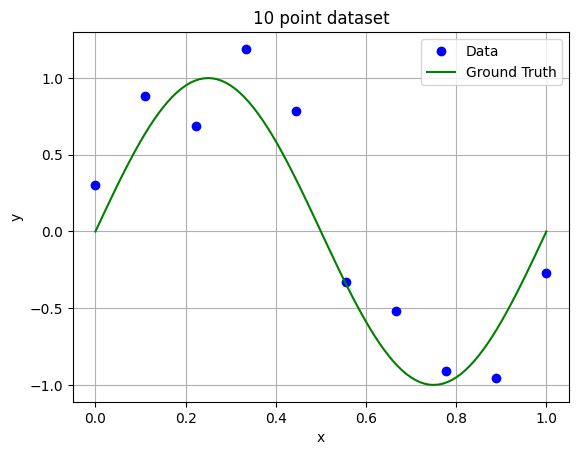

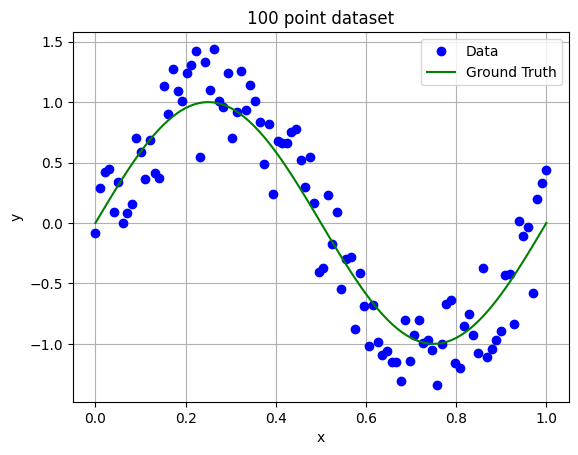

In [3]:
# YOUR CODE GOES HERE
x10 = np.load('d10.npy')[:, 0]
y10 = np.load('d10.npy')[:, 1]
x100 = np.load('d100.npy')[:, 0]
y100 = np.load('d100.npy')[:, 1]

xt, yt = gt_function()
plot_data(x10, y10, xt, yt, '10 point dataset')
plot_data(x100, y100, xt, yt, '100 point dataset')

## Implement polynomial linear regression

Now you will implement polynomial linear least squares regression without regularization using the closed form solution from lecture to compute the model parameters. You will consider the following 4 cases:

1. Data:  data10.txt, Model: 2nd order polynomial (highest power of $x$ in your regression model = 2)  
1. Data: data100.txt, Model: 2nd order polynomial (highest power of $x$ in your regression model = 2)  
1. Data:  data10.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)  
1. Data: data100.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)

For each model:
- Print the learned model parameters `w`
- Use the model parameters `w` to predict `yr` values over a range of x values given by `xr = np.linspace(0,1,101)`
- Plot the data, ground truth function, and regressed model using `plot_model(x,y,xt,yt,xr,yr,title)` with an appropriate title.

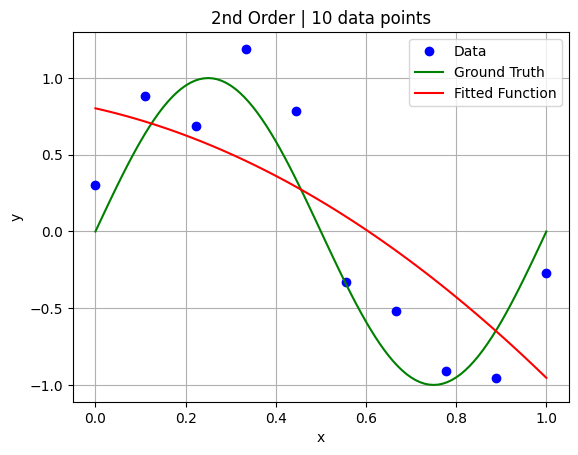

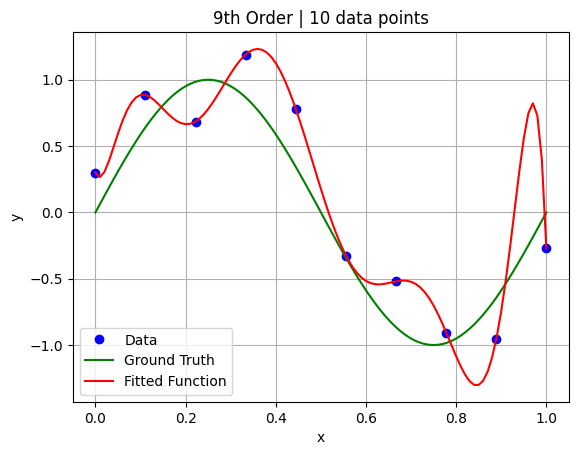

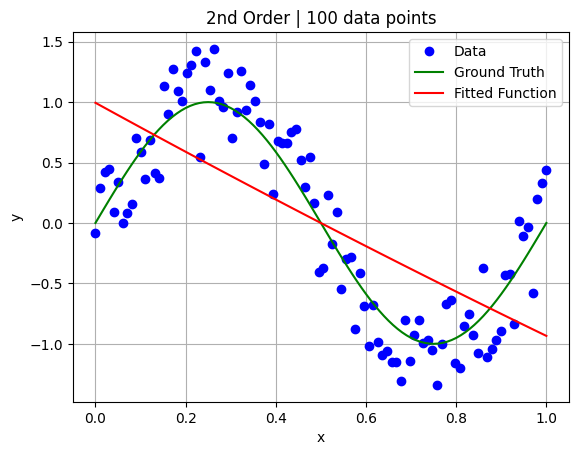

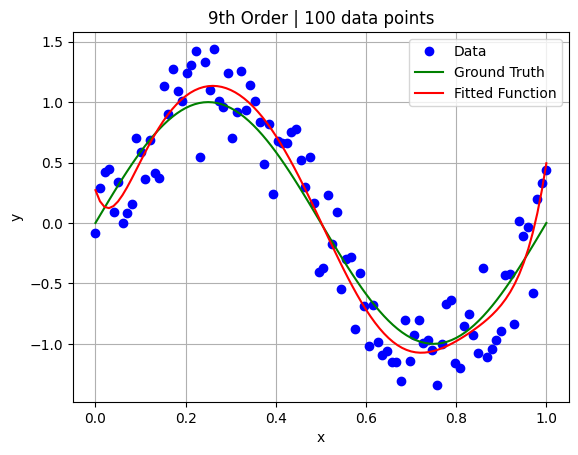

In [4]:
# YOUR CODE GOES HERE

# function to compute the weights given the data points and the order of the polynomial to be fit
def compute_w(x, y, k):
    x_design = design_matrix(x, k)
    w = np.linalg.inv(x_design.T @ x_design) @ x_design.T @ y
    return w

# function to construct the design matrix from the data points and the order of the polynomial
def design_matrix(x, k):
    x_design = np.zeros([np.shape(x)[0], k + 1])    
    for i in range(k + 1):
        x_design[:, i] = x ** i
    return x_design

# computing weights and making model predictions for 10 point data set and 2nd order polynomial
w_data10_2 = compute_w(x10, y10, 2)
xr = np.linspace(0, 1, 101)
yr = design_matrix(xr, 2) @ w_data10_2
plot_model(x10, y10, xt, yt, xr, yr, title = '2nd Order | 10 data points')

# computing weights and making model predictions for 10 point data set and 9th order polynomial
w_data10_9 = compute_w(x10, y10, 9)
yr = design_matrix(xr, 9) @ w_data10_9
plot_model(x10, y10, xt, yt, xr, yr, title = '9th Order | 10 data points')

# computing weights and making model predictions for 100 point data set and 2nd order polynomial
w_data100_2 = compute_w(x100, y100, 2)
yr = design_matrix(xr, 2) @ w_data100_2
plot_model(x100, y100, xt, yt, xr, yr, title = '2nd Order | 100 data points')

# computing weights and making model predictions for 100 point data set and 9th order polynomial
w_data100_9 = compute_w(x100, y100, 9)
yr = design_matrix(xr, 9) @ w_data100_9
plot_model(x100, y100, xt, yt, xr, yr, title = '9th Order | 100 data points')

## Discussion:

When the sample size (number of data points) is small, what issues or tendencies do you see with complex models?


Since the number of data points is less, the model complexity allows the function too be overfit to the sample. This causes the function to be more complex than necessary, resulting in incorrect predictions.

## Implement polynomial linear regression with $L_2$ regularization

You will repeat the previous section, but this time using $L_2$ regularization. Your regularization term should be $\lambda w' \mathbb{I}_m w$, where $\lambda = e^{-10}$, and $\mathbb{I}_m$ is the modified identity matrix that masks out the bias term  from  regularization. 

You will consider only two cases:
1. Data:  data10.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)  
1. Data: data100.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)  

For each model:
- Print the learned model parameters `w`
- Use the model parameters `w` to predict `yr` values over a range of x values given by `xr = np.linspace(0,1,101)`
- Plot the data, ground truth function, and regressed model using `plot_model(x,y,xt,yt,xr,yr,title)` with an appropriate title.

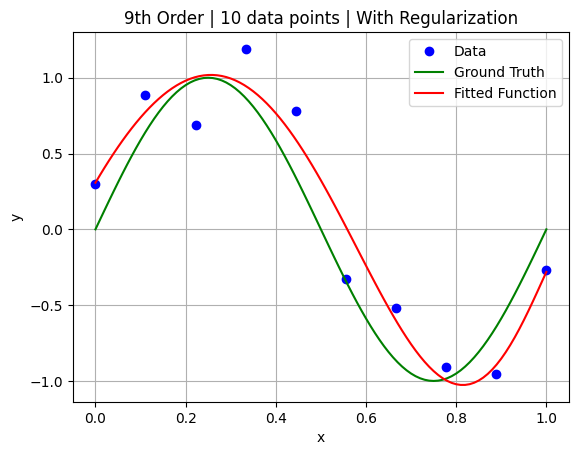

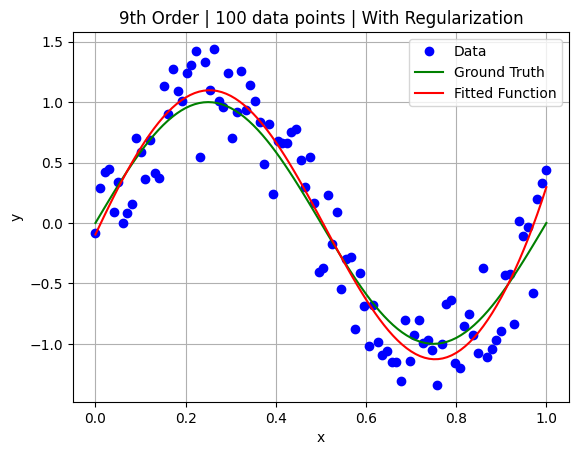

In [5]:
# YOUR CODE GOES HERE
from math import exp

# function to compute the weights with L2 regularization given the data points and the order of the function
def compute_w_reg(x, y, k, lam):
    x_design = design_matrix(x, k)
    I_prime = np.identity(np.shape(x_design)[1])
    I_prime[-1, -1] = 0

    w = np.linalg.inv(x_design.T @ x_design + lam*I_prime) @ x_design.T @ y
    return w

lam = exp(-10)

# computing weights and making model predictions for 10 point data set and 9th order polynomial
w_data10_9_reg = compute_w_reg(x10, y10, 9, lam)
yr = design_matrix(xr, 9) @ w_data10_9_reg
plot_model(x10, y10, xt, yt, xr, yr, title = '9th Order | 10 data points | With Regularization')

# computing weights and making model predictions for 100 point data set and 9th order polynomial
w_data100_9_reg = compute_w_reg(x100, y100, 9, lam)
yr = design_matrix(xr, 9) @ w_data100_9_reg
plot_model(x100, y100, xt, yt, xr, yr, title = '9th Order | 100 data points | With Regularization')

## Discussion:

What differences between the regularized and standard 9th order models fit to `d10` do you notice? How does regularization affect the fitted function?

The regularization function does a much better job in the 10 data points case, as it penalizes model complexity and reduces overfitting to small fluctuations etc.

## LLS with $L_2$ regularization and gradient descent

For complex models, the size of $X'X$ can be large, making matrix inversion computationally demanding. Instead, one can use gradient descent to compute $w$. In our notes, we derived the gradient descent approach both for unregularized as well as $L_2$ regularized linear regression. The formula for the gradient descent approach with $L_2$ regularization is:  

$ \frac{\partial obj}{\partial w} = X'Xw - X'y + \lambda \mathbb{I}_m w$

$ w^{new} \leftarrow w^{cur} - \alpha \frac{\partial obj}{\partial w}$


In this problem, could gradient descent get stuck in a local minimum? Explain why / why not?

### *Your answer goes here*

You will consider just a single case in the following question:

1. Data:  data10.txt, Model: 9th order polynomial.

Starting with a weight vector of zeros as the initial guess, and $\lambda = e^{-10}$, $\alpha = 0.075$, apply 50000 iterations of
gradient descent to find the optimal model parameters. In practice, when you train your own models you will have to determine these parameters yourself!

For the trained model:
- Print the learned model parameters `w`
- Use the model parameters `w` to predict `yr` values over a range of x values given by `xr = np.linspace(0,1,101)`
- Plot the data, ground truth function, and regressed model using `plot_model(x,y,xt,yt,xr,yr,title)` with an appropriate title.


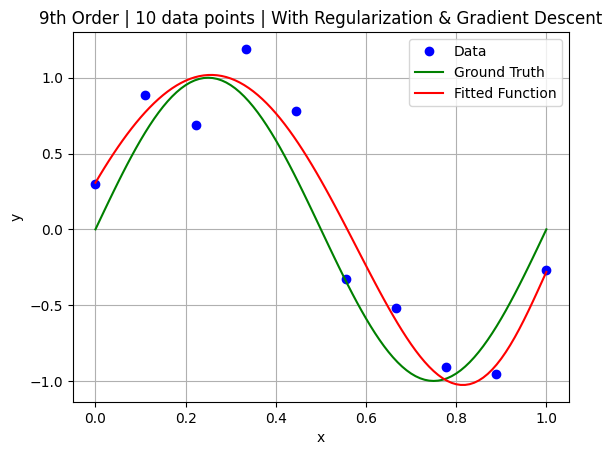

In [10]:
# YOUR CODE GOES HERE
from math import exp

# function to execute gradient descent to arrive to a better estimation of the weights from the previous value
def grad_desc(w, x_design, yr, alpha, lam, iter):
    Im = np.identity(np.shape(w)[0])
    Im[-1, -1] = 0
    for i in range(iter):
        grad = x_design.T @ (x_design @ w - yr) + lam * Im @ w
        w_new = w - alpha * grad
    return w_new

w = compute_w_reg(x10, y10, 9, lam)
alpha = 0.075
iter = 50000
x_design = design_matrix(xr, 9)
yr = x_design @ w

w = grad_desc(w, x_design, yr, alpha, lam, iter)

plot_model(x10, y10, xt, yt, xr, yr, title = '9th Order | 10 data points | With Regularization & Gradient Descent')

## Discussion:

Visually compare the result you just obtained to the same 9th order polynomial model with $L_2$ regularization where you solved for `w` directly in the previous section. They should be very similar. Comment on whether gradient descent has converged. 

Visually, there's not much of a difference between the plots with and without gradient descent. The gradient descent does not seem to have converged, especially close to the final data point.